# Scalar Fields: eigenvalues Demonstration on SemanticKITTI

# Imports

In [1]:
from pyntcloud import PyntCloud
import numpy as np
import pandas as pd

In [2]:
!ls ../dataset

KITTI  LoDNN  SemanticKITTI  VLP16


In [62]:
bin_path = "../dataset/SemanticKITTI/kitti/dataset/sequences/00/velodyne/000000.bin"
points = np.fromfile(bin_path, dtype=np.float32).reshape(-1, 4)
dataset = pd.DataFrame({'x':points[:,0],
                       'y':points[:,1],
                       'z':points[:,2],
                       'r':points[:,3]})

#anky_cloud = PyntCloud.from_file()
anky_cloud = PyntCloud(dataset)
anky_cloud

PyntCloud
124668 points with 1 scalar fields
0 faces in mesh
0 kdtrees
0 voxelgrids
Centroid: -1.4353549480438232, 1.02487313747406, -1.2107388973236084
Other attributes:

---

# Visualization: Pandas built-in

Because PyntCloud.points is a pandas.DataFrame, we can leverage the built-in [visualization options of pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html):

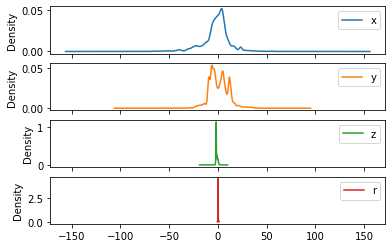

In [64]:
anky_cloud.points[["x", "y", "z", "r"]].plot(kind="kde", subplots=True);


# Visualize cloud and color with one of the columns

In [66]:
anky_cloud.plot(use_as_color='z', cmap='jet')

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-1.4353549480438232, 45.90348565578461, 3.02…

# Colored with reflectancce

In [67]:
anky_cloud.plot(use_as_color='r')

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-1.4353549480438232, 45.90348565578461, 3.02…

---

# Getting `k` nearest neighbors

We need to find the `k` nearest neighbors of each point.


You cand learn more about hoy to find neighbors in `examples/[neighbors]` notebooks.

**Note**

The number of neighbors has a high impact on the results of the different scalar fields that will be computed above, it should be selected according to the density of your point cloud.

In [35]:
k_neighbors = anky_cloud.get_neighbors(k=100)

We need to get the eigen values associated to each point.

You can learn more about this scalar field in `examples/[scalar_fields] Neighbors`

In [68]:
eigenvalues = anky_cloud.add_scalar_field(
    "eigen_values", 
    k_neighbors=k_neighbors)

# Anisotropy

$\huge A_\lambda = \frac{\lambda_1 - \lambda_2}{\lambda_3}$

In [69]:
anisotropy = anky_cloud.add_scalar_field("anisotropy", ev=eigenvalues)

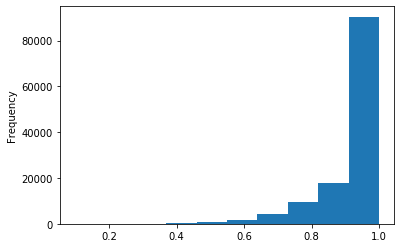

In [70]:
anky_cloud.points[anisotropy].plot(kind="hist");

In [39]:
anky_cloud.plot(use_as_color=anisotropy, cmap="jet")

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-1.4353549480438232, 45.90348565578461, 3.02…

![anisotropy](data/images/scalar_fields-eigen_values-1.png)

---

# Curvature

$\huge C_\lambda = \frac{\lambda_3}{\sum_\lambda}$

In [40]:
curvature = anky_cloud.add_scalar_field("curvature", ev=eigenvalues)

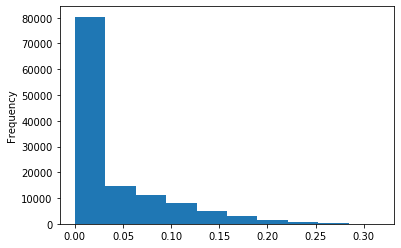

In [41]:
anky_cloud.points[curvature].plot(kind="hist");

In [42]:
anky_cloud.plot(use_as_color=curvature, cmap="jet")

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-1.4353549480438232, 45.90348565578461, 3.02…

![curvature](data/images/scalar_fields-eigen_values-2.png)

---

# Eigenentropy

$\huge E_\lambda = - \sum_{j=1}^{3} \lambda_j \ln(\lambda_j)$

In [43]:
eigenentropy = anky_cloud.add_scalar_field("eigenentropy", ev=eigenvalues)

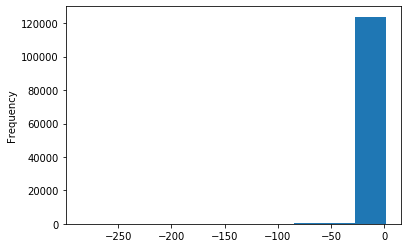

In [44]:
anky_cloud.points[eigenentropy].plot(kind="hist");

In [45]:
anky_cloud.plot(use_as_color=eigenentropy, cmap="jet")

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-1.4353549480438232, 45.90348565578461, 3.02…

![eigenentropy](data/images/scalar_fields-eigen_values-3.png)

---

# Sum of eigenvalues

$\huge \sum_\lambda = \sum_{j=1}^{3} \lambda_j$

In [46]:
eigensum = anky_cloud.add_scalar_field("eigen_sum", ev=eigenvalues)

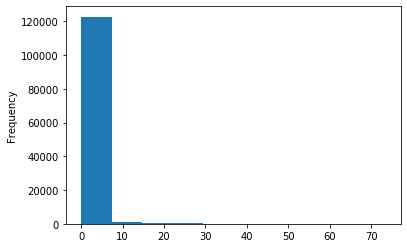

In [47]:
anky_cloud.points[eigensum].plot(kind="hist");

In [49]:
anky_cloud.plot(use_as_color=eigensum, cmap="jet")

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-1.4353549480438232, 45.90348565578461, 3.02…

![eigensum](data/images/scalar_fields-eigen_values-4.png)

---

# Linearity

$\huge L_\lambda = \frac{\lambda_1 - \lambda_2}{\lambda_1}$

In [50]:
linearity = anky_cloud.add_scalar_field("linearity", ev=eigenvalues)

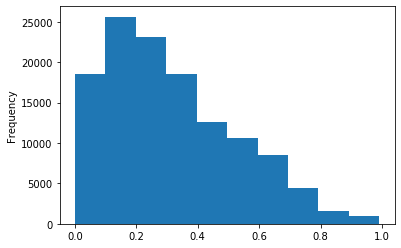

In [51]:
anky_cloud.points[linearity].plot(kind="hist");

In [52]:
anky_cloud.plot(use_as_color=linearity, cmap="jet")

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-1.4353549480438232, 45.90348565578461, 3.02…

![linearity](data/images/scalar_fields-eigen_values-5.png)

---

# Omnivariance

$\large O_\lambda = \sqrt[3]{\prod_{j=1}^{3}\lambda_j}$

In [53]:
omnivariance = anky_cloud.add_scalar_field("omnivariance", ev=eigenvalues)

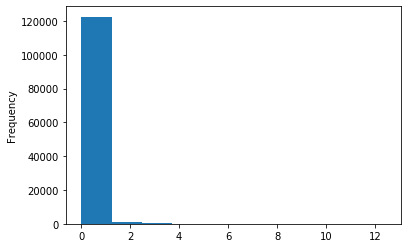

In [54]:
anky_cloud.points[omnivariance].plot(kind="hist");

In [55]:
anky_cloud.plot(use_as_color=omnivariance, cmap="jet")

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-1.4353549480438232, 45.90348565578461, 3.02…

![omnivariance](data/images/scalar_fields-eigen_values-6.png)

---

# Planarity

$\huge P_\lambda = \frac{\lambda_2 - \lambda_3}{\lambda_1}$

In [56]:
planarity = anky_cloud.add_scalar_field("planarity", ev=eigenvalues)

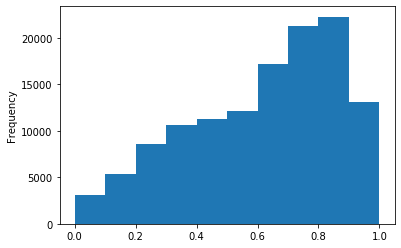

In [57]:
anky_cloud.points[planarity].plot(kind="hist");

In [58]:
anky_cloud.plot(use_as_color=planarity, cmap="jet")

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-1.4353549480438232, 45.90348565578461, 3.02…

![planarity](data/images/scalar_fields-eigen_values-7.png)

---

# Sphericity

$\huge S_\lambda = \frac{\lambda_3}{\lambda_1}$

In [59]:
sphericity = anky_cloud.add_scalar_field("sphericity", ev=eigenvalues)

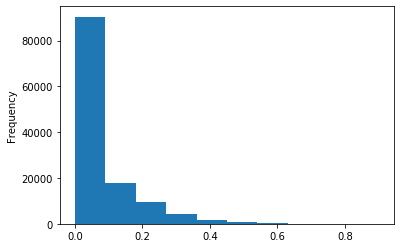

In [60]:
anky_cloud.points[sphericity].plot(kind="hist");

In [61]:
anky_cloud.plot(use_as_color=sphericity, cmap="jet")

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-1.4353549480438232, 45.90348565578461, 3.02…

![sphericity](data/images/scalar_fields-eigen_values-8.png)